In [28]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('data/images/Cars8.png')  # Replace 'car_image.jpg' with the path to your car image

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to determine plate orientation based on the aspect ratio
def get_plate_orientation(contour):
    _, _, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    if aspect_ratio > 1:
        return 'horizontal'
    else:
        return 'vertical'

# Get potential plates and validate them based on aspect ratio
min_area = 500
potential_plates = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        orientation = get_plate_orientation(contour)
        x, y, w, h = cv2.boundingRect(contour)

        aspect_ratio = w / float(h)
        if 2.5 < aspect_ratio < 5:  # Adjust these thresholds based on your plates' aspect ratios
            potential_plates.append((x, y, w, h, orientation))

# Draw bounding boxes on the original image for potential plates
for plate in potential_plates:
    x, y, w, h, orientation = plate
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Detected Plates', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

import os
for dirname, _, filenames in os.walk('C:\\Users\\msi\\Desktop\\AO\\Projekt\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars0.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars1.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars10.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars100.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars101.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars102.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars103.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars104.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars105.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars106.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars107.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars108.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars109.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars11.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars110.xml
C:\Users\msi\Desktop\AO\Projekt\data\annotations\Cars111.xml
C:\Users\msi\Desktop\AO\Projek

In [13]:
IMAGE_SIZE = 224

In [14]:
img_dir = "data\\images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))
print(X)

[array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]

In [15]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [16]:
path = 'data\\annotations'
text_files = ['data\\annotations\\'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))
print(y)

[[187, 144, 101, 104], [146, 144, 75, 115], [169, 147, 78, 4], [119, 109, 98, 95], [134, 164, 93, 150], [206, 169, 42, 125], [113, 138, 105, 132], [109, 168, 87, 159], [115, 148, 85, 137], [156, 196, 126, 175], [147, 136, 67, 93], [140, 166, 80, 145], [155, 128, 64, 97], [152, 171, 73, 151], [183, 133, 160, 111], [178, 135, 119, 109], [153, 106, 45, 75], [171, 134, 84, 84], [220, 191, 3, 11], [179, 179, 139, 165], [149, 166, 83, 147], [48, 165, 23, 152], [147, 129, 72, 98], [121, 138, 104, 126], [155, 185, 68, 130], [140, 169, 89, 150], [199, 152, 188, 143], [142, 126, 109, 109], [132, 180, 89, 165], [179, 223, 170, 214], [198, 221, 156, 168], [164, 150, 57, 73], [214, 151, 201, 139], [171, 172, 62, 64], [119, 150, 86, 119], [135, 141, 106, 122], [92, 117, 50, 92], [222, 182, 8, 21], [224, 199, 211, 187], [140, 121, 92, 100], [74, 145, 42, 126], [178, 210, 145, 183], [137, 99, 91, 87], [114, 160, 99, 151], [142, 137, 85, 104], [129, 173, 108, 167], [153, 162, 52, 117], [218, 220, 145, 

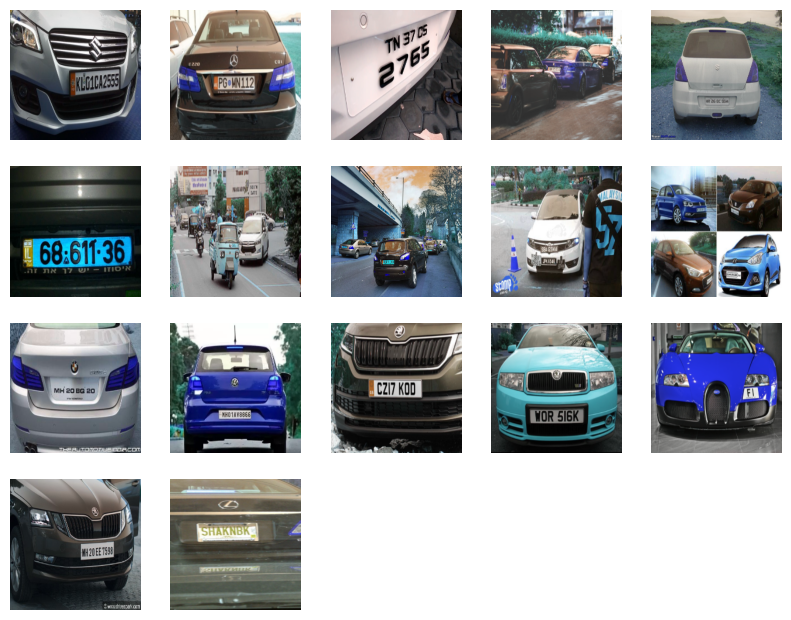

In [18]:


plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

In [20]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [21]:
#Renormalisation
X = X / 255
y = y / 255

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [26]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

In [27]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

NameError: name 'Sequential' is not defined